Imports

In [ ]:
from google.colab import output
import librosa
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
drive.mount('/content/drive')
from scipy import signal
from pathlib import Path
import os
from numpy.ma.extras import polyfit
!pip install ruptures
import ruptures as rpt
cats_train_path = '/content/drive/MyDrive/catsanddogs/train/cat'
dogs_train_path = '/content/drive/MyDrive/catsanddogs/train/dog'
cat_test_path = '/content/drive/MyDrive/catsanddogs/test/cats'
dog_test_path = '/content/drive/MyDrive/catsanddogs/test/dogs'

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.7 MB/s eta 0:00:00


Training

Breakpoints detected: [92, 129]


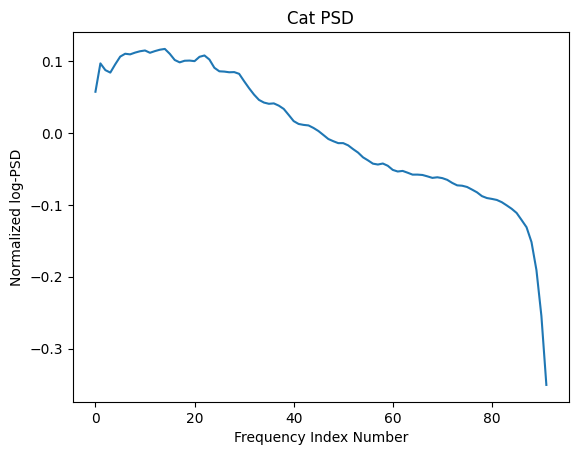

In [ ]:
#For cats training sounds
# For cats variables, I want to use cat in front of variables. For example, cat_data, cat_sr, ...


nfft = 256

cat_all_filenames = []
cat_all_f = []
cat_all_Pxx = []


for filename in os.listdir(cats_train_path):
  if filename.endswith(".wav"):
    cat_file_path = os.path.join(cats_train_path,filename)
    #Calculating data and sample rate
    cat_data,cat_sr = librosa.load(cat_file_path)
    #Calculating time using the sample rate
    cat_time = np.linspace(0,len(cat_data)/cat_sr,num=len(cat_data))
    #Calculating frequency and Power spectral density
    #PSD and Frequency is calculated with the data and sample rate
    cat_f,cat_Pxx = signal.welch(cat_data,cat_sr, nfft = nfft)
    #Logarithm of the PSD value is calculated because log-PSD is more understandable than PSD
    #If the log-PSD multiplied with the 20, decibel can be calculated.
    #However, decibel will not be used in the code.
    cat_Pxx = np.log(cat_Pxx)
    #All values that are calculated above, are written in the folder.
    cat_all_filenames.append(filename)
    cat_all_f.append(cat_f)
    cat_all_Pxx.append(cat_Pxx)

#Calculating the mean of the Pxx.
cat_all_Pxx_mean = np.mean(cat_all_Pxx, axis = 0)
#Calculation of the normalized log-PSD, min and max values of mean log-PSD is needed.
cat_all_Pxx_mean_min = np.min(cat_all_Pxx_mean)
cat_all_Pxx_mean_max = np.max(cat_all_Pxx_mean)
#Calculation of the normalized log-PSD.
cat_all_Pxx_mean_norm = (cat_all_Pxx_mean - cat_all_Pxx_mean_min)/(cat_all_Pxx_mean_max - cat_all_Pxx_mean_min)

#Calculating the BreakPointDetection which can detect automaticly the break point.

cat_algo = rpt.Pelt(model="rbf", min_size=10, jump=1).fit(cat_all_Pxx_mean_norm)
cat_result = cat_algo.predict(pen=25)
print("Breakpoints detected:", cat_result)

#Cutting the array with using BreakPoint Detection
Cat_all_Pxx_mean_norm = cat_all_Pxx_mean_norm[:cat_result[0]]

#Normalized value substracted from mean normalized value,
#because obtaining the data around 0 and average 0 is better precision is higher

final_cat_Pxx = Cat_all_Pxx_mean_norm - np.mean(Cat_all_Pxx_mean_norm)
plt.plot(final_cat_Pxx)
plt.xlabel('Frequency Index Number')
plt.ylabel('Normalized log-PSD')
plt.title('Cat PSD')
plt.show()

Breakpoints detected: [92, 129]


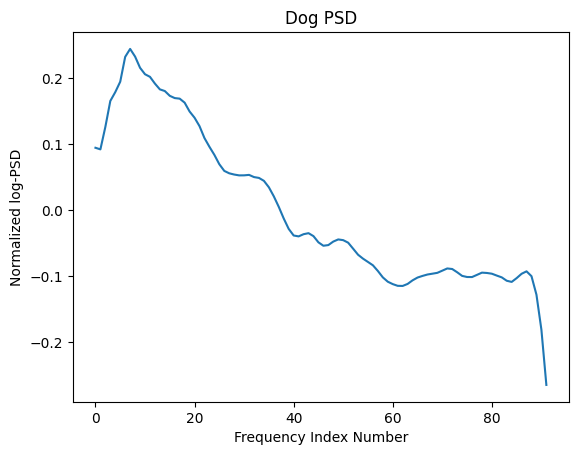

In [ ]:
#For dogs training sounds
# For dogs variables, I want to use dog in front of variables. For example, dog_data, dog_sr, ...

dog_all_filenames = []
dog_all_f = []
dog_all_Pxx = []

for filename in os.listdir(dogs_train_path):
  if filename.endswith(".wav"):
    dog_file_path = os.path.join(dogs_train_path,filename)
    #Calculating data and sample rate
    dog_data,dog_sr = librosa.load(dog_file_path)
    #Calculating time with using the sample rate
    dog_time = np.linspace(0,len(dog_data)/dog_sr,num=len(dog_data))
    #Calculating frequency and Power spectral density
    #PSD and Frequency is calculated with the data and sample rate
    dog_f,dog_Pxx = signal.welch(dog_data,dog_sr,nfft = nfft)
    #Logarithm of the PSD value is calculated because log-PSD is more understandable than PSD
    #If the log-PSD multiplied with the 20, decibel can be calculated.
    #However, decibel will not be used in the code.
    dog_Pxx = np.log(dog_Pxx)
    #All values that are calculated above, are written in the folder.
    dog_all_filenames.append(filename)
    dog_all_f.append(dog_f)
    dog_all_Pxx.append(dog_Pxx)



#Calculating the mean of the Pxx.
dog_all_Pxx_mean = np.mean(dog_all_Pxx, axis = 0)
#Calculation of the normalized log-PSD, min and max values of mean log-PSD is needed.
dog_all_Pxx_mean_min = np.min(dog_all_Pxx_mean)
dog_all_Pxx_mean_max = np.max(dog_all_Pxx_mean)
#Calculation of the normalized log-PSD.
dog_all_Pxx_mean_norm = (dog_all_Pxx_mean - dog_all_Pxx_mean_min) / (dog_all_Pxx_mean_max - dog_all_Pxx_mean_min)

#Calculating the BreakPointDetection which can detect automaticly the break point.
dog_algo = rpt.Pelt(model="rbf", min_size=10, jump=1).fit(dog_all_Pxx_mean_norm)
dog_result = dog_algo.predict(pen=25)
print("Breakpoints detected:", dog_result)

#Cutting the array with using BreakPoint Detection
Dog_all_Pxx_mean_norm = dog_all_Pxx_mean_norm[:dog_result[0]]

#Normalized value substracted from mean normalized value,
#because obtaining the data around 0 and average 0 is better precision is higher

final_dog_Pxx = Dog_all_Pxx_mean_norm - np.mean(Dog_all_Pxx_mean_norm)

plt.plot(final_dog_Pxx)
plt.xlabel('Frequency Index Number')
plt.ylabel('Normalized log-PSD')
plt.title('Dog PSD')
plt.show()

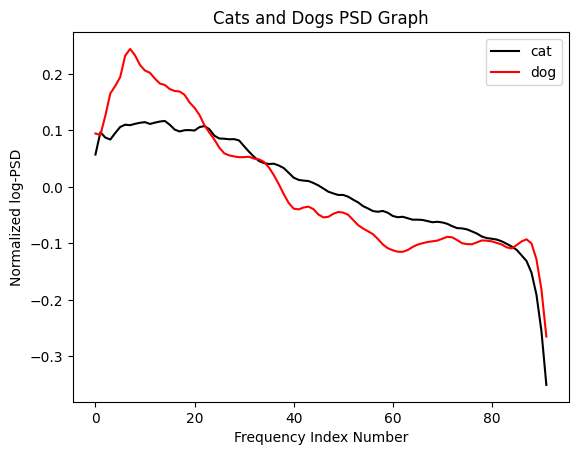

In [ ]:
plt.plot(final_cat_Pxx, color='black', label = 'cat')
plt.plot(final_dog_Pxx, color='red', label = 'dog')
plt.legend(loc='upper right')
plt.title('Cats and Dogs PSD Graph')
plt.xlabel('Frequency Index Number')
plt.ylabel('Normalized log-PSD')
plt.show()

Test

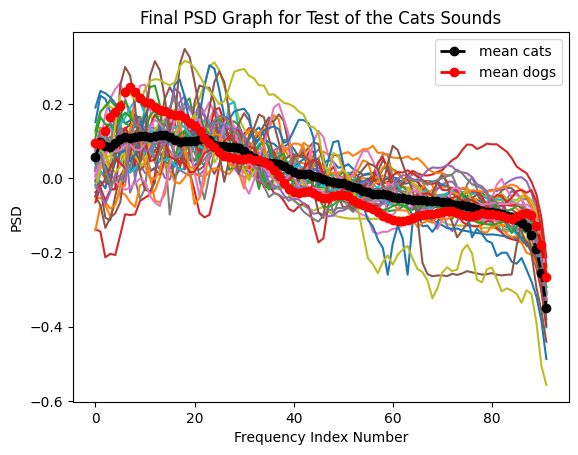

Incorrects: 5
Corrects: 34
Current accuracy: 87.17948717948718


In [ ]:
cattest_all_filenames = []
cattest_all_f = []
cattest_all_Pxx = []

num_correct = 0
num_incorrect = 0

for filename in os.listdir(cat_test_path):
  if filename.endswith(".wav"):
    cat_testfile_path = os.path.join(cat_test_path,filename)
    #Calculating data and sample rate
    cattest_data,cattest_sr = librosa.load(cat_testfile_path)
    #Calculating time
    cattest_time = np.linspace(0,len(cattest_data)/cattest_sr,num=len(cattest_data))
    #Calculating frequency and Power spectral density
    cattest_f,cattest_Pxx=signal.welch(cattest_data,cattest_sr, nfft = nfft)
    cattest_Pxx = np.log(cattest_Pxx)

    #Calculating min and max value for Pxx to calculate normalized Pxx
    cattest_Pxx_max = np.max(cattest_Pxx)
    cattest_Pxx_min = np.min(cattest_Pxx)
    cattest_Pxx_norm = (cattest_Pxx - cattest_Pxx_min) / (cattest_Pxx_max - cattest_Pxx_min)

    #cutting the array
    cattest_Pxx_norm = cattest_Pxx_norm[:cat_result[0]]

    cattest_Pxx_norm = cattest_Pxx_norm - np.mean(cattest_Pxx_norm)

    #Calculating distances between cat and dog auido data to compare every test data
    dist_cat = np.linalg.norm(final_cat_Pxx - cattest_Pxx_norm)
    dist_dog = np.linalg.norm(final_dog_Pxx - cattest_Pxx_norm)

    #If distance of cat is closer to test data, the test data must be cat sound
    if dist_cat < dist_dog :
       num_correct = num_correct + 1
    else :
       num_incorrect = num_incorrect + 1

    cattest_all_filenames.append(filename)
    cattest_all_f.append(cattest_f)
    cattest_all_Pxx.append(cattest_Pxx)

    plt.plot(cattest_Pxx_norm)

#Calculating accuracy
accuracy = ((num_correct) / (num_correct + num_incorrect)) * 100

plt.plot(final_cat_Pxx,color='black', marker='o', linestyle='dashed',
     linewidth=2, markersize=6 , label= 'mean cats')
plt.plot(final_dog_Pxx,color='red', marker='o', linestyle='dashed',
     linewidth=2, markersize=6 , label = 'mean dogs')
plt.legend(loc='upper right')
plt.xlabel('Frequency Index Number')
plt.ylabel('PSD')
plt.title('Final PSD Graph for Test of the Cats Sounds')

plt.show()
print(f"Incorrects: {num_incorrect}")
print(f"Corrects: {num_correct}")
print(f"Current accuracy: {accuracy}")

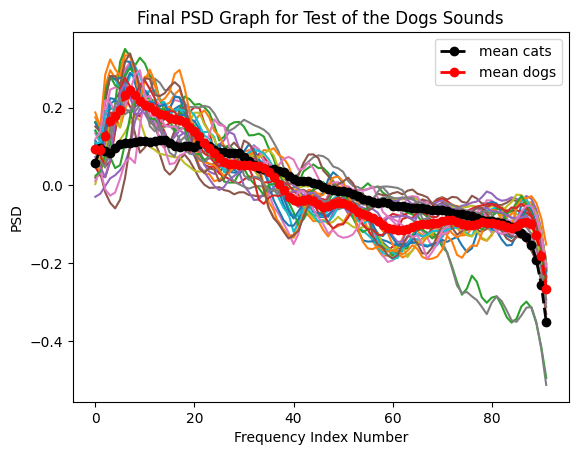

Incorrects: 6
Corrects: 22
Current accuracy: 78.57142857142857


In [ ]:
dogtest_all_filenames = []
dogtest_all_f = []
dogtest_all_Pxx = []

num_correct = 0
num_incorrect = 0

for filename in os.listdir(dog_test_path):
  if filename.endswith(".wav"):
    dog_testfile_path = os.path.join(dog_test_path,filename)
    #Calculating data and sample rate
    dogtest_data,dogtest_sr = librosa.load(dog_testfile_path)
    #Calculating time
    dogtest_time = np.linspace(0,len(dogtest_data)/dogtest_sr,num=len(dogtest_data))
    #Calculating frequency and Power spectral density
    dogtest_f,dogtest_Pxx=signal.welch(dogtest_data,dogtest_sr, nfft = nfft)
    dogtest_Pxx = np.log(dogtest_Pxx)

    #Calculating min and max value for Pxx to calculate normalized Pxx
    dogtest_Pxx_max = np.max(dogtest_Pxx)
    dogtest_Pxx_min = np.min(dogtest_Pxx)
    dogtest_Pxx_norm = (dogtest_Pxx - dogtest_Pxx_min) / (dogtest_Pxx_max - dogtest_Pxx_min)

    dogtest_Pxx_norm = dogtest_Pxx_norm[:dog_result[0]]

    dogtest_Pxx_norm = dogtest_Pxx_norm - np.mean(dogtest_Pxx_norm)

    #Calculating distances between cat and dog auido data to compare every test data

    dist_cat = np.linalg.norm(final_cat_Pxx - dogtest_Pxx_norm)
    dist_dog = np.linalg.norm(final_dog_Pxx - dogtest_Pxx_norm)

    #If distance of dog is closer to test data, the test data must be dog sound
    if dist_cat > dist_dog :
       num_correct = num_correct + 1
    else :
       num_incorrect = num_incorrect + 1

    dogtest_all_filenames.append(filename)
    dogtest_all_f.append(dogtest_f)
    dogtest_all_Pxx.append(dogtest_Pxx)

    plt.plot(dogtest_Pxx_norm)

#Calculating accuracy
accuracy = ((num_correct) / (num_correct + num_incorrect)) * 100

plt.plot(final_cat_Pxx,color='black', marker='o', linestyle='dashed',
     linewidth=2, markersize=6 , label = 'mean cats')
plt.plot(final_dog_Pxx,color='red', marker='o', linestyle='dashed',
     linewidth=2, markersize=6 , label = 'mean dogs')
plt.legend(loc='upper right')
plt.xlabel('Frequency Index Number')
plt.ylabel('PSD')
plt.title('Final PSD Graph for Test of the Dogs Sounds')

plt.show()
print(f"Incorrects: {num_incorrect}")
print(f"Corrects: {num_correct}")
print(f"Current accuracy: {accuracy}")